#### **Agentic Rag**

By combining the knowledge base with Agents, you can create an Agentic RAG (Retrieval-Augmented Generation) solution that not only improves the chatbot’s ability to retrieve accurate answers but also enhances its overall performance. 

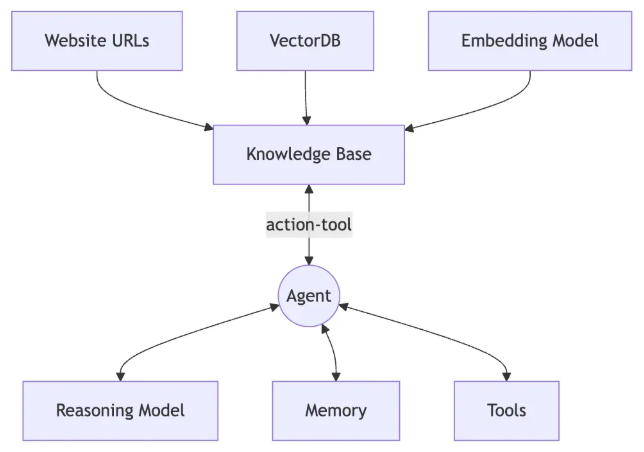

In this project we are using both knowledgebase and phidata tools both. Both will act as a tools and then agent will decide which tool to use for the user query.

##### 1. Importing necessary libraries and loading the environment variables

In [16]:
from phi.knowledge.website import WebsiteKnowledgeBase
from phi.vectordb.qdrant import Qdrant
from phi.agent import Agent
from phi.storage.agent.sqlite import SqlAgentStorage
from phi.model.groq import Groq
from phi.tools.googlesearch import GoogleSearch
from phi.embedder.huggingface import HuggingfaceCustomEmbedder
from phi.knowledge.website import WebsiteReader
import os
from dotenv import load_dotenv
load_dotenv()

True

In [17]:
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["HUGGINGFACEHUB_API_TOKEN"]=os.getenv("HUGGINGFACEHUB_API_TOKEN")
os.environ["MISTRAL_API_KEY"]=os.getenv("MISTRAL_API_KEY")
os.environ["PINECONE_API_KEY"]=os.getenv("PINECONE_API_KEY")

##### 2. Setting up the vector databases and embedding model

In [18]:
# embedding model
embedder = HuggingfaceCustomEmbedder(model="hkunlp/instructor-large",dimensions=768,api_key=os.getenv("HUGGINGFACEHUB_API_TOKEN"))

# vector database
COLLECTION_NAME = "agentic-rag"
QDRANT_URL = "https://7c7bbbc6-e4c9-4bdd-8925-d21a0f939d75.eu-west-1-0.aws.cloud.qdrant.io:6333"


vector_db = Qdrant(
    embedder=embedder,
    collection=COLLECTION_NAME,
    url=QDRANT_URL,
    api_key=os.getenv('QDRANT_API_KEY'),
)

##### 3. Creating the knowledgebase

In [19]:
url = "https://qdrant.tech/documentation/overview/"

knowledge_base = WebsiteKnowledgeBase(
    reader=WebsiteReader(),
    urls=[url],
    vector_db=vector_db,
)

In [20]:
knowledge_base.load(recreate=True,skip_existing=False)

INFO     Loading knowledge base

NotImplementedError: 